# **🚨Tugas**
## **1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.**

Langkah 1 - Load Library

In [3]:
# Import library dan modul yang dibutuhkan
from tensorflow.keras.datasets import cifar10 #Mengimpor dataset CIFAR-10 yang disediakan oleh TensorFlow.
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

Langkah 2 - Unduh Dataset CIFAR

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1150s 7us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)



Langkah 3 - Normalisasi data dan konversi label ke vektor one-hot encoded

In [5]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Langkah 4 - Memisahkan data latih menjadi data latih dan data validasi

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
     

Langkah 5 - Mendefinisikan model Convolutional Neural Network (CNN)

In [7]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()

    return model

Langkah 6 - Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data

In [8]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)


Langkah 7 - Mengonfigurasi dan mengompilasi model jaringan saraf konvolusi (CNN) dalam TensorFlow atau Keras.

In [9]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

d:\Machine Learning\Machine_Learning_2024\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,281,802 (27.78 MB)

 Trainable params: 7,281,802 (27.78 MB)

 Non-trainable params: 0 (0.00 B)

Langkah 8 - Melatih model dengan ImageDataGenerator

In [10]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=25,
    validation_data=(X_valid, y_valid),
    verbose=1
)

d:\Machine Learning\Machine_Learning_2024\.conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 570s 884ms/step - accuracy: 0.1470 - loss: 2.3097 - val_accuracy: 0.3364 - val_loss: 1.7946
Epoch 2/25


d:\Machine Learning\Machine_Learning_2024\.conda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3364 - val_loss: 1.7946
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 486s 778ms/step - accuracy: 0.3204 - loss: 1.8249 - val_accuracy: 0.4751 - val_loss: 1.4633
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4751 - val_loss: 1.4633
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 458s 732ms/step - accuracy: 0.4278 - loss: 1.5858 - val_accuracy: 0.5146 - val_loss: 1.3338
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5146 - val_loss: 1.3338
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 512s 819ms/step - accuracy: 0.4944 - loss: 1.4473 - val_accuracy: 0.5586 - val_loss: 1.2362
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5586 - val_loss: 1.2362
Epoch 9/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 494s 791ms/step - accur

Langkah 9 - Mengevaluasi model pada set tes

In [11]:
scores = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.7299 - loss: 0.8432


Langkah 10 - Melakukan prediksi

<Axes: >

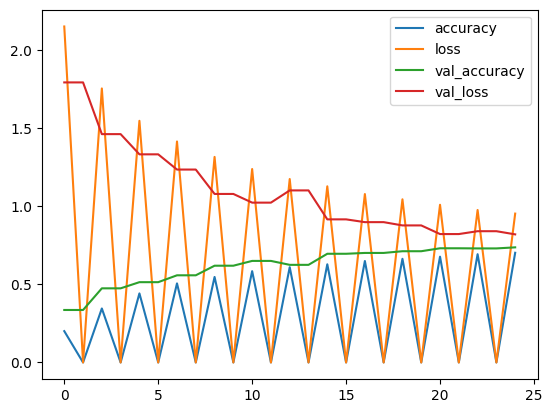

In [12]:
pd.DataFrame(history.history).plot()

Langkah 11 - Tampilkan laporan klasifikasi

In [13]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.7299 - loss: 0.8432
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      1000
           1       0.87      0.91      0.89      1000
           2       0.79      0.46      0.58      1000
           3       0.59      0.39      0.47      1000
           4       0.68      0.62      0.65      1000
           5       0.61      0.65      0.63      1000
           6       0.60      0.92      0.72      1000
           7       0.72      0.83      0.77      1000
           8       0.91      0.82      0.86      1000
           9       0.82      0.86      0.84      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



Langkah 12 - Menampilkan visualisasi hasil prediksi

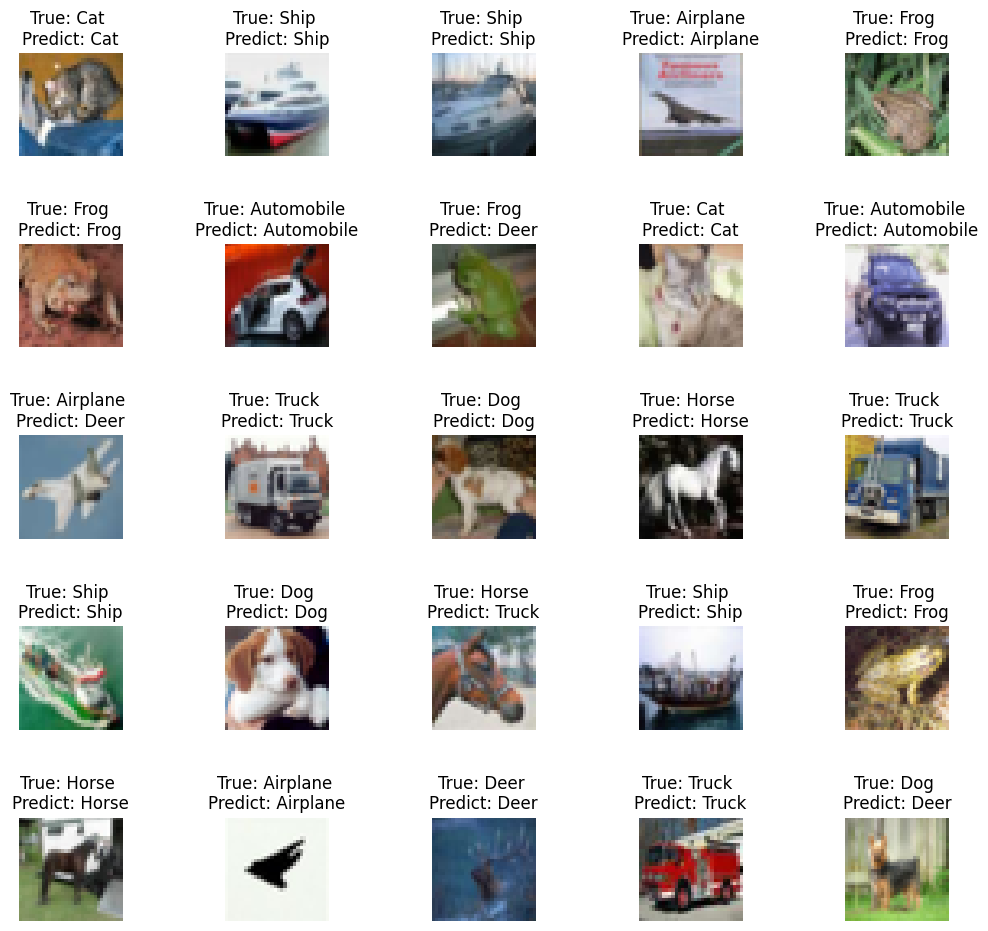

In [14]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## **2. Buatlah model CNN untuk klasifikasi dataset MNIST.**

1. Import Library

In [15]:
# mengimpor TensorFlow untuk membuat dan melatih model neural network.
import tensorflow as tf
# Mengimpor modul layers dan models dari Keras, yang merupakan bagian dari TensorFlow untuk membangun model neural network.
from tensorflow.keras import layers, models
#  Mengimpor dataset MNIST yang berisi gambar digit tulisan tangan.
from tensorflow.keras.datasets import mnist
# Mengimpor fungsi to_categorical untuk melakukan one-hot encoding pada label.
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2. Load Mnist dataset

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Normalisasi dan Reshape data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 51s 4us/step


3. One-Hot Encoding label

In [17]:
train_labels = to_categorical(train_labels) # Melakukan one-hot encoding pada label pelatihan.
test_labels = to_categorical(test_labels) # Melakukan one-hot encoding pada label uji

4. Membangun model CNN

In [18]:
#  Membuat model Sequential, yang berarti kita akan membangun model layer-by-layer secara berurutan.
model = models.Sequential()

# Menambahkan layer konvolusi dengan 32 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan input_shape=(28, 28, 1) yang sesuai dengan dimensi gambar MNIST.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Menambahkan layer pooling maksimum dengan ukuran pool 2x2 untuk mengurangi dimensi gambar.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Menambahkan layer flatten untuk meratakan output dari layer sebelumnya menjadi satu dimensi.
model.add(layers.Flatten())
# Menambahkan layer dense (fully connected) dengan 64 neuron dan fungsi aktivasi ReLU.
model.add(layers.Dense(64, activation='relu'))
# Menambahkan layer output dengan 10 neuron (sesuai jumlah kelas pada MNIST) dan fungsi aktivasi softmax untuk output klasifikasi multikelas.
model.add(layers.Dense(10, activation='softmax'))

d:\Machine Learning\Machine_Learning_2024\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5. Menampilkan ringkasan model

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

6. Mengompilasi model dengan menggunakan optimizer Adam

In [20]:
# fungsi loss categorical_crossentropy (karena ini adalah masalah klasifikasi multikelas), dan metrik akurasi.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

7.  Melatih model dengan data pelatihan selama 10 epoch, menggunakan data validasi untuk mengukur performa model selama pelatihan.    

In [21]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8984 - loss: 0.3352 - val_accuracy: 0.9843 - val_loss: 0.0510
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9849 - loss: 0.0491 - val_accuracy: 0.9873 - val_loss: 0.0393
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9898 - loss: 0.0317 - val_accuracy: 0.9893 - val_loss: 0.0356
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9926 - loss: 0.0238 - val_accuracy: 0.9875 - val_loss: 0.0401
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.9909 - val_loss: 0.0315
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9955 - loss: 0.0146 - val_accuracy: 0.9896 - val_loss: 0.0368
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9882 - val_loss: 0.0470
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9959 - loss: 0

8. Visualisasi akurasi pelatihan dan validasi

313/313 - 1s - 2ms/step - accuracy: 0.9912 - loss: 0.0390


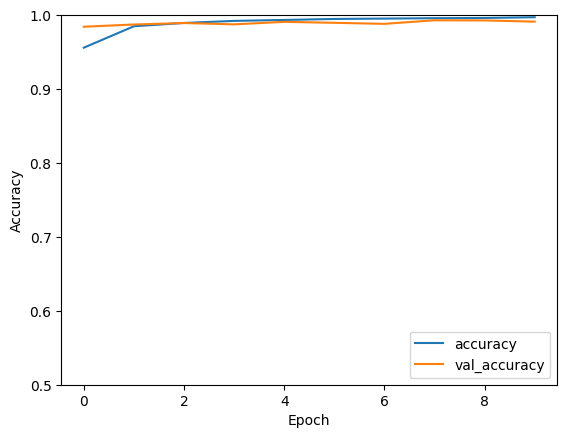

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [23]:
print(test_acc)

0.9911999702453613


9. Fungsi untuk menampilkan contoh hasil prediksi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


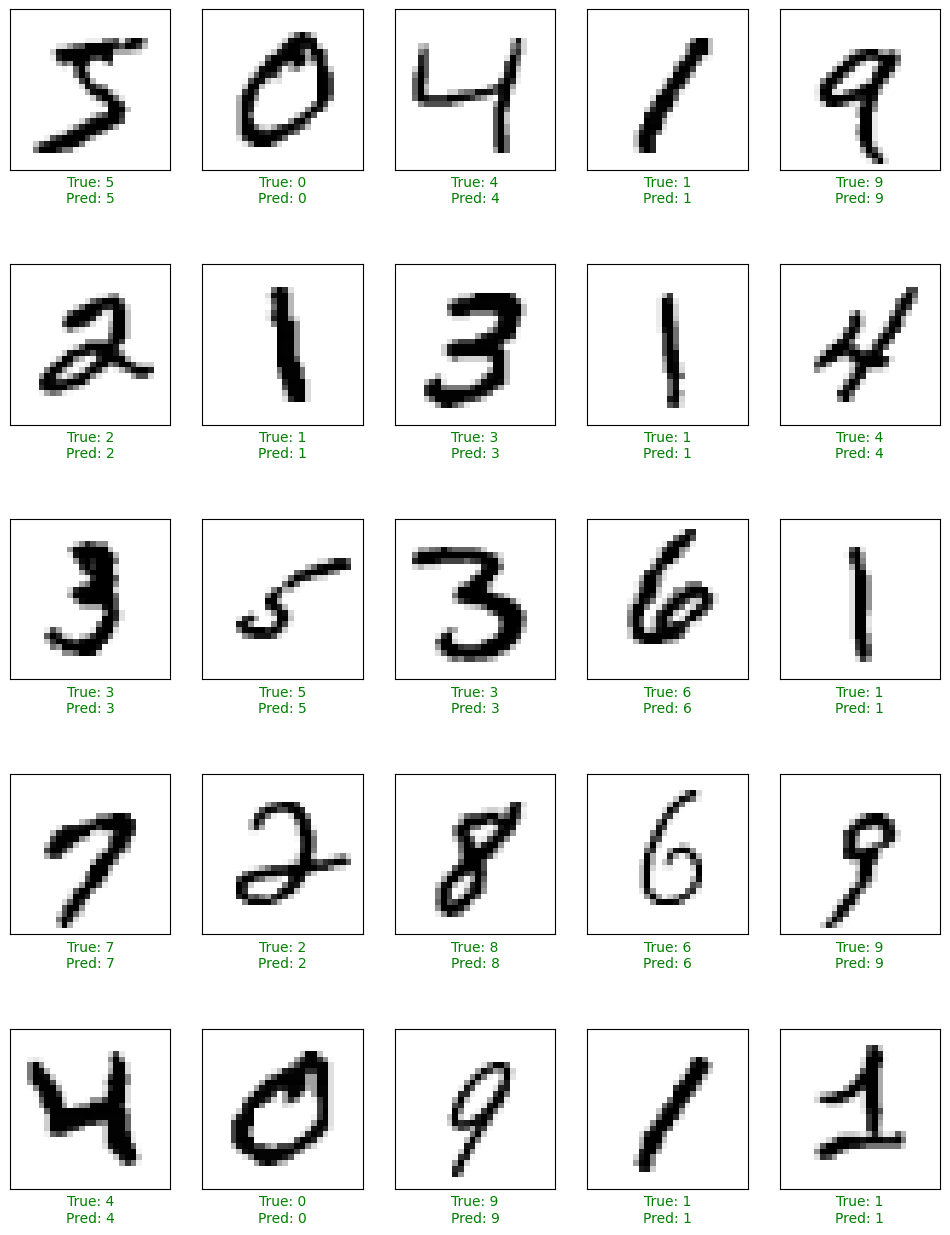

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(images, true_labels, model, class_names, num_samples=25):
    # Menggunakan model untuk melakukan prediksi
    predictions = model.predict(images[:num_samples])

    # Mengubah prediksi menjadi indeks kelas dengan nilai tertinggi
    predicted_labels = np.argmax(predictions, axis=1)

    # Tampilkan hasil prediksi
    plt.figure(figsize=(12, 16))
    for i in range(num_samples):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)

        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if true_label == predicted_label else 'red'
        plt.xlabel(f'True: {true_label}\nPred: {predicted_label}', color=color)

    plt.show()

# Contoh definisi class_names
class_names = [str(i) for i in range(10)]

# Memanggil fungsi untuk menampilkan hasil prediksi pada set pelatihan
visualize_predictions(train_images, np.argmax(train_labels, axis=1), model, class_names)